In [ ]:
print(tf.keras.__version__)
print(tf.__version__)

2.4.0
2.3.0


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.model_selection import train_test_split  

In [ ]:
DFver1=pd.read_excel("pp_df_y.xlsx")

In [ ]:
DFver1=DFver1.drop(['Unnamed: 0'],1)

In [ ]:
y_set=DFver1['y']

In [ ]:
DFver1=DFver1.drop(['y'],1)

In [ ]:
y_set = tf.keras.utils.to_categorical(y_set)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(DFver1, y_set)

In [ ]:
model=tf.keras.models.Sequential()
model = tf.keras.models.Sequential([layers.Input(shape=x_train.shape[1]), layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001),activity_regularizer=tf.keras.regularizers.l2(0.001)
                                    ), layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.001),activity_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'
                                    ),  layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),activity_regularizer=tf.keras.regularizers.l2(0.001), activation='relu'
                                    ),
                                    layers.Dense(4, activation='softmax') ])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',  metrics=['categorical_accuracy'])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)


Epoch 1/200
346/346 [==============================] - 1s 2ms/step - loss: 1.1562 - categorical_accuracy: 0.5143 - val_loss: 0.8705 - val_categorical_accuracy: 0.6860
Epoch 2/200
346/346 [==============================] - 1s 1ms/step - loss: 0.7322 - categorical_accuracy: 0.7305 - val_loss: 0.7465 - val_categorical_accuracy: 0.7103
Epoch 3/200
346/346 [==============================] - 1s 1ms/step - loss: 0.6358 - categorical_accuracy: 0.7740 - val_loss: 0.6986 - val_categorical_accuracy: 0.7196
Epoch 4/200
346/346 [==============================] - 0s 1ms/step - loss: 0.5978 - categorical_accuracy: 0.7844 - val_loss: 0.6692 - val_categorical_accuracy: 0.7428
Epoch 5/200
346/346 [==============================] - 1s 2ms/step - loss: 0.5706 - categorical_accuracy: 0.7948 - val_loss: 0.6455 - val_categorical_accuracy: 0.7497
Epoch 6/200
346/346 [==============================] - 1s 1ms/step - loss: 0.5489 - categorical_accuracy: 0.8073 - val_loss: 0.6350 - val_categorical_accuracy: 0.764

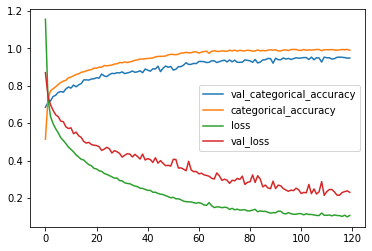

In [ ]:
hists=model.fit(x_train, y_train, epochs=200, batch_size=10, validation_split=0.2, verbose=1,callbacks=[early_stopping])
plt.plot(hists.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.plot(hists.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(hists.history['loss'], label='loss')
plt.plot(hists.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
model.evaluate(x_test, y_test, batch_size=20)


72/72 [==============================] - 0s 913us/step - loss: 0.2030 - categorical_accuracy: 0.9646


[0.20295587182044983, 0.9645587205886841]

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_test.shape

(1439, 4)

In [ ]:
model.save('./model_DL.h5')

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                1264      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 68        
Total params: 2,404
Trainable params: 2,404
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_test

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
a=[]
for i in range(len(y_pred)):
  b=np.argmax(y_pred[i])
  a.append(b)

In [ ]:
c=[]
for i in range(len(y_test)):
  d=np.argmax(y_pred[i])
  c.append(d)

In [ ]:
classification_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       343\n           1       1.00      1.00      1.00       466\n           2       1.00      1.00      1.00       315\n           3       1.00      1.00      1.00       315\n\n    accuracy                           1.00      1439\n   macro avg       1.00      1.00      1.00      1439\nweighted avg       1.00      1.00      1.00      1439\n'